# Matemática Computacional - Atividade 0



## Ferramentas
Utlizaremos as bibliotecas NumPy para facilitar o calculo com matrizes e vetores, e o MatPlotLib para gerar as visualizações em gráficos.

In [44]:
import numpy as np
import matplotlib.pyplot as plt

## Classe de Vetores e Gráficos

Definindo as classe de vetores para ser compatível com a classe Gráfico.

In [45]:
class Vetor:
    def __init__(self, nome, cor, entradas):
        self.nome = nome
        self.cor = cor
        self.entradas = np.array(entradas)

Definindo a classe Gráfico.

In [46]:
class Grafico:
    def __init__(self, raio:int, nome:str, vetores: list[Vetor]):
        self.raio = raio
        self.nome = nome
        self.vetores = vetores

        if vetores is None:
            self.vetores = []

    def plot_graph(self):
        fig, ax = plt.subplots()
        ax.set_xlim(-self.raio, self.raio)
        ax.set_ylim(-self.raio, self.raio)
        ax.set_aspect('equal')
        ax.set_title(self.nome)

        # Configura grade de 1 em 1 e coloca abaixo dos vetores
        ax.set_xticks(np.arange(-self.raio, self.raio + 1, 1))
        ax.set_yticks(np.arange(-self.raio, self.raio + 1, 1))
        ax.grid(True, which='both', linestyle='--', linewidth=0.7)
        ax.set_axisbelow(True)  # grade fica embaixo dos vetores

        for v in self.vetores:
            ax.quiver(0, 0,v.entradas[0], v.entradas[1],angles='xy', scale_units='xy', scale=1,color=v.cor, label=v.nome)

        ax.legend()
        plt.show()


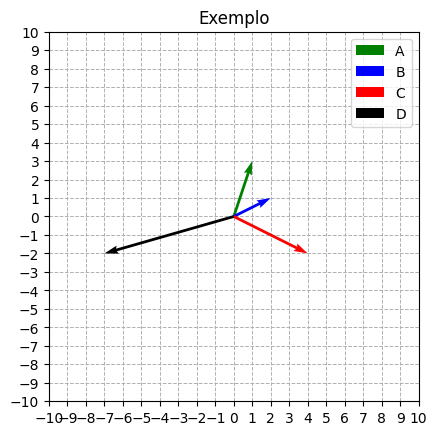

In [47]:
lista_vetores = [
    Vetor("A","green",np.array([1,3])),
    Vetor("B","blue",np.array([2,1])),
    Vetor("C","red",np.array([4,-2])),
    Vetor("D","black",np.array([-7,-2]))
  ]

grafico = Grafico(10, "Exemplo", lista_vetores)
grafico.plot_graph()


## Funções
Definiremos as funções que representam as transformações lineares para essa atividade.

### - Rotacionar em 90 graus no sentido horário (bidimensional).
Função que aplica a seguinte matriz A a um vetor n:
$$A =
\begin{pmatrix}
0 & -1 \\
1 & 0\end{pmatrix}$$

In [48]:
def rotacionar_90_graus(vetor):
  matriz_rotacao = np.array([[0, 1], [-1, 0]])
  vetor_rotacionado = np.dot(matriz_rotacao, vetor)
  return vetor_rotacionado

### - Cisalhamento na horizontal por n.
Função que distorce horizontalmente um vetor por um dado valor n.

In [49]:
def cisalhamento_horizontal(vetor, n):
  matriz_cisalhamento = np.array([[1, n], [0, 1]])
  vetor_cisalhado = np.dot(matriz_cisalhamento, vetor)
  return vetor_cisalhado

## Comandos
Comandos das questões apresentadas pelo professor.

## 0.1 - Rotação horária de 90° e shear (cisalhamento) em x.

Sabendo que as transformações de rotação e de cisalhamento são lineares, elas portanto podem ser representadas de forma matricial, facilitando o cálculo com vetores.

onde a operação de rotação em 90º é representado por:
$$M_{Rotação} =\begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$$

e a operação de cisalhamento horizontal por um fator n é:
$$M_{Cisalhamento} =\begin{bmatrix} 1 & n \\ 0 & 1 \end{bmatrix}$$


as funções que definimos em python anteriormente, podem ser algebricamente definidas como:
1. Rotação:
$$
R_{90º} : \mathbb{R}^2 → \mathbb{R}^2 \\
R_{90ª} (\vec{x}) = M_{Rot}.\vec{x}
$$

2. Cisalhamento (horizontal por um fator n):
$$
C_n: \mathbb{R}^2 → \mathbb{R}^2\\
C_n(\vec{x})=\begin{bmatrix} 1 & n \\ 0 & 1\end{bmatrix}\vec{x}\\
$$

Tomemos os vetores:
$$
\vec{x} = \begin{bmatrix}2\\3\end{bmatrix}, \vec{y} = \begin{bmatrix}-1\\5\end{bmatrix}
$$

In [50]:
# Instanciando os vetores acima em codigo, ficam:
x = Vetor("x","red",np.array([2,3]))
y = Vetor("y","blue",np.array([-1,5]))

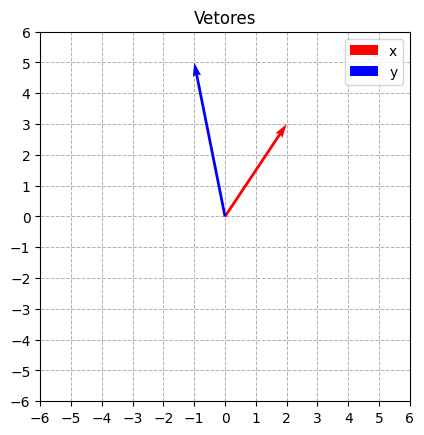

In [51]:
# Plotando os Vetores
g = Grafico(6, "Vetores", [x,y])
g.plot_graph()

### Rotação

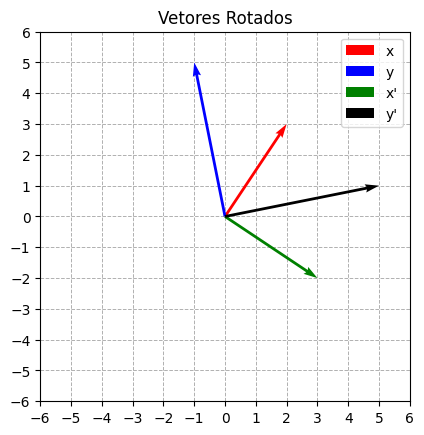

In [52]:
# Aplicando a rotação no vetores x e y
x_rotacionado = rotacionar_90_graus(x.entradas)
y_rotacionado = rotacionar_90_graus(y.entradas)

g = Grafico(6, "Vetores Rotados", [x,y,Vetor("x'","green",x_rotacionado),Vetor("y'","black",y_rotacionado)])
g.plot_graph()

### Cisalhamento

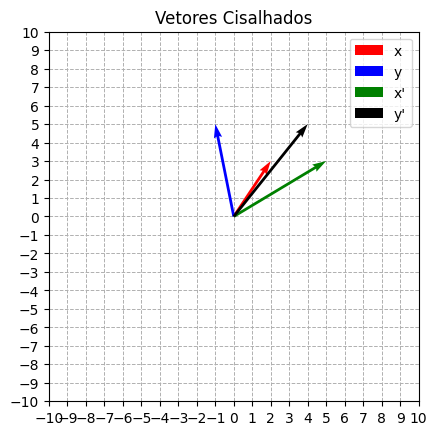

In [53]:
# Aplicando cisalhamento aos vetores x e y
x_cisalhado = cisalhamento_horizontal(x.entradas, 1)
y_cisalhado = cisalhamento_horizontal(y.entradas, 1)

g = Grafico(10, "Vetores Cisalhados", [x,y,Vetor("x'","green",x_cisalhado),Vetor("y'","black",y_cisalhado)])
g.plot_graph()

## 0.2 - A obtenção das matrizes de transformação a partir dos vetores unitários (bases).


### Rotação
Utilizando a base canônica:
$$\hat{\imath}=\begin{bmatrix}1 \\ 0\end{bmatrix}, \hat{\jmath}=\begin{bmatrix}0 \\ 1\end{bmatrix}$$
e concatenando obtemos a matriz identidade de ordem 2:
$$I_{2} = \begin{bmatrix}1 & 0\\ 0 & 1\end{bmatrix}$$

dessa forma se aplicarmos a rotação que definimos, nos vetores canônicos, obtemos uma das bases no novo sistema de coordenadas (espaço vetorial).<br>
Então:
$$M_{Rotação}.I_{2} = \begin{bmatrix}0 & -1\\ 1 & 0\end{bmatrix}$$<br>
no gráfico é representado assim:



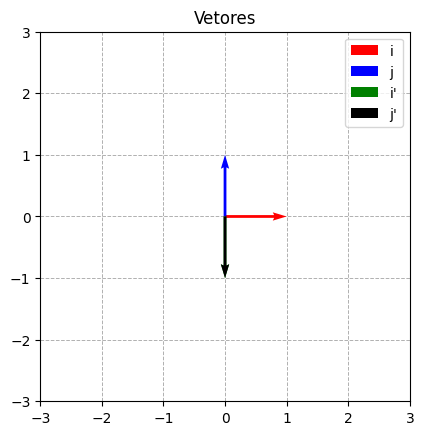

In [54]:
i = Vetor("i","red",np.array([1,0]))
j = Vetor("j","blue",np.array([0,1]))
i_rotacionado = Vetor("i'","green",rotacionar_90_graus(i.entradas))
j_rotacionado = Vetor("j'","black",rotacionar_90_graus(i.entradas))

g = Grafico(3, "Vetores", [i,j,i_rotacionado,j_rotacionado])
g.plot_graph()

### Cisalhamento
Utilizando a base canônica:
$$\hat{\imath}=\begin{bmatrix}1 \\ 0\end{bmatrix}, \hat{\jmath}=\begin{bmatrix}0 \\ 1\end{bmatrix}$$
e concatenando obtemos a matriz identidade de ordem 2:
$$I_{2} = \begin{bmatrix}1 & 0\\ 0 & 1\end{bmatrix}$$

dessa forma se aplicarmos o cisalhamento em 2, que definimos nos vetores canônicos, obtemos uma das bases no novo sistema de coordenadas (espaço vetorial).<br>
Então:
$$ C_2 (\vec{x})=\begin{bmatrix} 1 & 2 \\ 0 & 1\end{bmatrix}\vec{x}\\ $$<br>
no gráfico é representado assim:

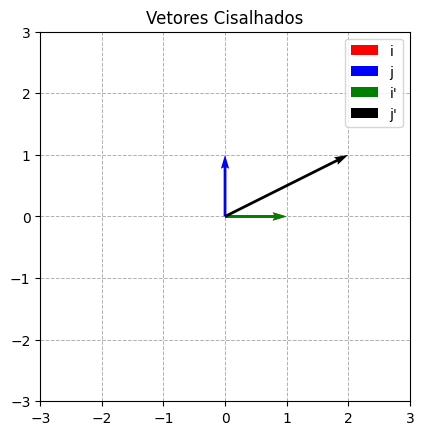

In [61]:
# Aplicando cisalhamento aos vetores canônicos
i = Vetor("i","red",np.array([1,0]))
j = Vetor("j","blue",np.array([0,1]))
i_cisalhado = cisalhamento_horizontal(i.entradas,2)
j_cisalhado = cisalhamento_horizontal(j.entradas,2)

g = Grafico(3, "Vetores Cisalhados", [i,j,Vetor("i'","green",i_cisalhado),Vetor("j'","black",j_cisalhado)])
g.plot_graph()

## 0.3 - A aplicação passo a passo dessas matrizes a dois vetores arbitrários.

Tomemos os vetores arbitrários K e J:
$$ K= $$  